# Python Project


## Introduction

As someone that that lives in the GTA (Mississauga) there’s a lot of driving to do to get from point a to point b, and driving is definitely the most efficient from of transportation. Instead of a 30min bus ride from my home to Square One I would much rather just drive 10min. With that the data question becomes, which country makes the most efficient cars? And I hypothesise that Japanese cars are the most fuel efficient.

Since there are many types of cars and many different makes within each country, it wouldn't be so informative to look just at the country. But to also dig deeper and view which make from the top three most fuel-efficient countries will be more insightful when it comes to selecting a vhecial.

## Data Setup and Cleaning

### Loading in all the tools and data

In [1]:
# import tools
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#load data and view
df = pd.read_csv('Car_data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


### Adding country of origin (Made)

The first problem is that there is no column that states which country the Make of car is from, so that will need to be added.

In [2]:
df['Make'].unique() # gives each unique 'Make' so I can create a dictionary with the coresponding country

array(['BMW', 'Audi', 'FIAT', 'Mercedes-Benz', 'Chrysler', 'Nissan',
       'Volvo', 'Mazda', 'Mitsubishi', 'Ferrari', 'Alfa Romeo', 'Toyota',
       'McLaren', 'Maybach', 'Pontiac', 'Porsche', 'Saab', 'GMC',
       'Hyundai', 'Plymouth', 'Honda', 'Oldsmobile', 'Suzuki', 'Ford',
       'Cadillac', 'Kia', 'Bentley', 'Chevrolet', 'Dodge', 'Lamborghini',
       'Lincoln', 'Subaru', 'Volkswagen', 'Spyker', 'Buick', 'Acura',
       'Rolls-Royce', 'Maserati', 'Lexus', 'Aston Martin', 'Land Rover',
       'Lotus', 'Infiniti', 'Scion', 'Genesis', 'HUMMER', 'Tesla',
       'Bugatti'], dtype=object)

In [3]:
Made_Conversion = {'BMW': 'German', 'Audi': 'German', 'FIAT': 'Italian', 'Mercedes-Benz': 'German', 'Chrysler': 'American', 'Nissan': 'Japanese',
       'Volvo': 'Swedish', 'Mazda': 'Japanese', 'Mitsubishi': 'Japanese', 'Ferrari': 'Italian', 'Alfa Romeo': 'Italian', 'Toyota': 'Japanese',
       'McLaren': 'British', 'Maybach': 'German', 'Pontiac': 'American', 'Porsche': 'German', 'Saab': 'Swedish', 'GMC': 'American',
       'Hyundai': 'South Korean', 'Plymouth': 'American', 'Honda': 'Japanese', 'Oldsmobile': 'American', 'Suzuki': 'Japanese', 'Ford': 'American',
       'Cadillac': 'American', 'Kia': 'South Korean', 'Bentley': 'British', 'Chevrolet': 'American', 'Dodge': 'American', 'Lamborghini': 'Italian',
       'Lincoln': 'American', 'Subaru': 'Japanese', 'Volkswagen': 'German', 'Spyker': 'Netherlands', 'Buick': 'American', 'Acura': 'Japanese',
       'Rolls-Royce': 'British', 'Maserati': 'Italian', 'Lexus': 'Japanese', 'Aston Martin': 'British', 'Land Rover': 'British',
       'Lotus': 'British', 'Infiniti': 'Japanese', 'Scion': 'Japanese', 'Genesis': 'South Korean', 'HUMMER': 'American', 'Tesla': 'American',
       'Bugatti': 'German'} # creats a dictionary and adds the corresponding County

df['Made'] = df['Make'].map(Made_Conversion) # maping in the new dictionary
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Made
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135,German
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650,German
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350,German
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450,German
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500,German


Something that was also noticed was there are many variations in the ‘market category’ column. But many of them have repetitive categories such as 'Luxury, Performance' or 'Luxury, High-Performance'. The next step is to make the category column cleaner and easier to group/graph.

In [4]:
# Categorizing the cars into 6 unique categories based on 'market category' column
def Category_Range(category): # create a function to help group the cars into more compareable categories
        if 'Luxury,High-Performance' in category:
            return ('Luxury, High-Performance')
        elif 'Luxury,Performance' in category:
            return ('Luxury, Performance')
        if  'Luxury' in category:
            return ('Luxury')
        elif 'High-Performance' in category:
            return ('High-Performance')
        elif 'Performance' in category:
            return ('Performance')
        else:
            return ('Regular')
        
df['Category'] = df['Market Category'].map(Category_Range) # maping in category with its coresponding market category
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Made,Category
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135,German,"Luxury, High-Performance"
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650,German,"Luxury, Performance"
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350,German,"Luxury, High-Performance"
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450,German,"Luxury, Performance"
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500,German,Luxury


## Graphing and Findings

### Country MPG

Check which country has the highest average mpg highway and city throughout all categories of cars

In [5]:
# This code creats a data frame of the country and the avg mpg or both city and highway
AVG_HWY = df.groupby('Made').agg(Avg_HWY=('highway MPG', 'mean'))
AVG_CITY = df.groupby('Made').agg(Avg_City=('highway MPG', 'mean'))

<AxesSubplot:title={'center':'Highway MPG'}, xlabel='Made'>

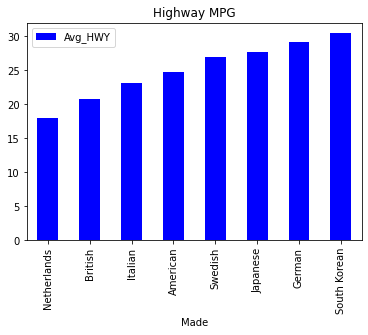

In [6]:
AVG_HWY.sort_values('Avg_HWY').plot(kind ='bar', color='blue', title='Highway MPG') # creating the graph

<AxesSubplot:title={'center':'City MPG'}, xlabel='Made'>

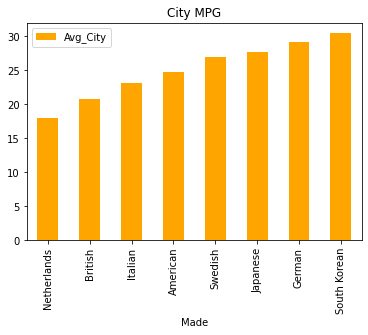

In [7]:
AVG_CITY.sort_values('Avg_City').plot(kind ='bar', color='orange', title='City MPG') # creating the graph

In both city and highway the top three remain consistent with South Korean, German and Japanese.

### Breaking down into category

Buy viewing the above graphs it can be tempting to conclude South Korean cars as the most fuel-efficient. But that is not entirely the case. From the data frame below displaying the top three countries and their categories Regular South Korean cars make up 80% of all their cars, and with all the Regular cars being the most fuel efficient it’s no surprise that the data can be skewed in favour of South Korea.

When breaking down the data into the data frame below, German Regular and Luxury cars (Regular: 33 HWY and 25 City, Luxury: 31 HWY and 22 City) are more fuel-efficient than South Korean Regular cars (Regular: 31 HWY and 24 City, Luxury: 26 HWY and 17 City). But as noticed from the previous example of South Korean car data being skewed a further look into the ‘Make’ will give a more clear and definitive answer to which country makes the most fuel-efficient car.

In [8]:
# created an aggregation to get more information
deepComp = df.groupby(['Made', 'Category']).agg(count=('Category', 'size'), avg_ECY=('Engine Cylinders', 'mean'), avg_HWY=('highway MPG', 'mean'), avg_City=('city mpg', 'mean'),  avg_PRICE=('MSRP', 'mean'))
round(deepComp).loc[['South Korean', 'German', 'Japanese']]

count  avg_ECY  avg_HWY  avg_City  \
Made         Category                                                      
South Korean High-Performance             15      6.0     24.0      16.0   
             Luxury                        3      6.0     26.0      17.0   
             Luxury, High-Performance     13      8.0     23.0      15.0   
             Luxury, Performance           6      6.0     27.0      17.0   
             Performance                  67      4.0     31.0      22.0   
             Regular                     433      5.0     31.0      24.0   
German       High-Performance             13      7.0     27.0      19.0   
             Luxury                      454      5.0     31.0      22.0   
             Luxury, High-Performance    437      7.0     24.0      16.0   
             Luxury, Performance         288      6.0     26.0      18.0   
             Performance                 332      4.0     31.0      23.0   
             Regular                     455      4.0     33.0      25.0   
Japanese     High-Performance            122      6.0     25.0      18.0   
             Luxury                      428      6.0     27.0      20.0   
             Luxury, High-Performance     82      7.0     25.0      18.0   
             Luxury, Performance         277      6.0     26.0      18.0   
             Performance                 329      5.0     28.0      21.0   
             Regular                    2602      5.0     28.0      22.0   

                                       avg_PRICE  
Made         Category                             
South Korean High-Performance            31170.0  
             Luxury                      46367.0  
             Luxury, High-Performance    59527.0  
             Luxury, Performance         40633.0  
             Performance                 27476.0  
             Regular                     23035.0  
German       High-Performance           434531.0  
             Luxury                      42865.0  
             Luxury, High-Performance   116214.0  
             Luxury, Performance         57704.0  
             Performance                 29776.0  
             Regular                     25246.0  
Japanese     High-Performance            43739.0  
             Luxury                      37157.0  
             Luxury, High-Performance    60276.0  
             Luxury, Performance         42561.0  
             Performance                 23866.0  
             Regular                     24206.0

In [20]:
pd.set_option('display.max_colwidth', 199) 
g = df.groupby('Made')['Make'].unique().loc[['South Korean', 'German', 'Japanese']]
g.to_frame()

,Make
Made,
South Korean,"[Hyundai, Kia, Genesis]"
German,"[BMW, Audi, Mercedes-Benz, Maybach, Porsche, Volkswagen, Bugatti]"
Japanese,"[Nissan, Mazda, Mitsubishi, Toyota, Honda, Suzuki, Subaru, Acura, Lexus, Infiniti, Scion]"


### Car Make Comparison

Now moving on to the specific make within the top three countries

Quick Overview of the graphs for each countries make before digging deeper into the numbers.

In [9]:
# Creating seperate graphs for each make in their country
Japanese_group_graph = df.groupby(['Made', 'Make']).agg(avg_HWY=('highway MPG', 'mean'), avg_City=('city mpg', 'mean')).loc['Japanese']
South_korean_gropu_graph = df.groupby(['Made', 'Make']).agg( avg_HWY=('highway MPG', 'mean'), avg_City=('city mpg', 'mean')).loc['South Korean']
German_group_graph = df.groupby(['Made', 'Make']).agg(avg_HWY=('highway MPG', 'mean'), avg_City=('city mpg', 'mean')).loc['German']

<AxesSubplot:title={'center':'South Korean Makes'}, xlabel='Make'>

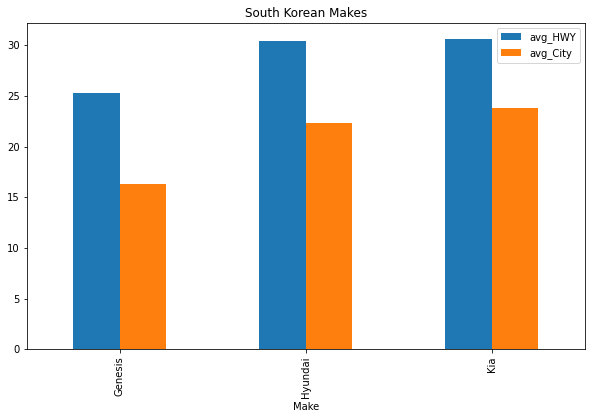

In [26]:
South_korean_gropu_graph.sort_values('avg_HWY').plot(kind='bar', figsize=(10,6), title='South Korean Makes')

<AxesSubplot:title={'center':'German Makes'}, xlabel='Make'>

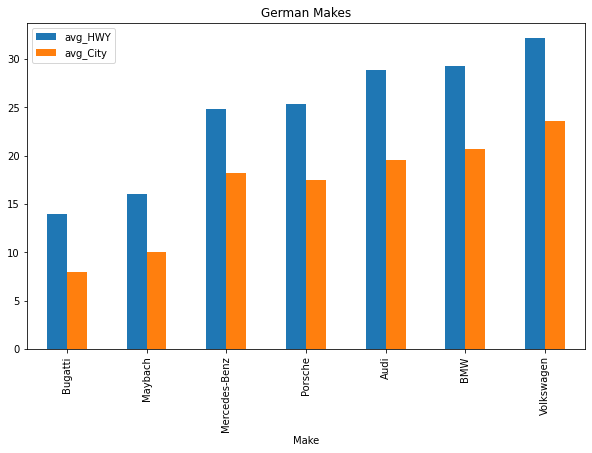

In [27]:
German_group_graph.sort_values('avg_HWY').plot(kind='bar', figsize=(10,6), title='German Makes')

<AxesSubplot:title={'center':'Japanese Makes'}, xlabel='Make'>

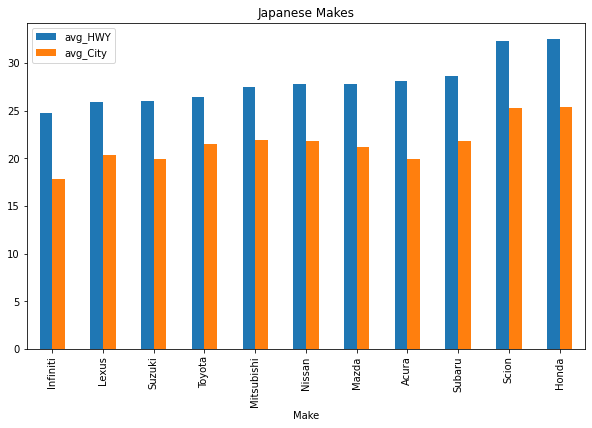

In [25]:
Japanese_group_graph.sort_values('avg_HWY').plot(kind='bar', figsize=(10,6), title='Japanese Makes')

## End Results

As stated above the higher amount of Volkswagen cars (809) as compared to the rest of the German made could be the reason for a higher avg fuel-efficiency. Although, Volkswagen is at an impressive 32 Highway and 24 City MPG, there is still a more fuel-efficient car make. With a 33 Highway and 25 City MPG, and $1,000 difference in price, the Japanese made Honda is the most fuel-efficient car.

In [13]:
# aggregated the makes to get better comparable data
South_Korean_group = df.groupby(['Made', 'Make']).agg(count=('Category', 'size'), avg_ECY=('Engine Cylinders', 'mean'), avg_HP=('Engine HP', 'mean'), avg_HWY=('highway MPG', 'mean'), avg_City=('city mpg', 'mean'),  avg_PRICE=('MSRP', 'mean')).loc['South Korean']
round(South_Korean_group)

,count,avg_ECY,avg_HP,avg_HWY,avg_City,avg_PRICE
Make,,,,,,
Genesis,3,7.0,347.0,25.0,16.0,46617.0
Hyundai,303,5.0,202.0,30.0,22.0,24597.0
Kia,231,5.0,207.0,31.0,24.0,25310.0


South Korean Makes ^

In [18]:
German_group = df.groupby(['Made', 'Make']).agg(count=('Category', 'size'), avg_ECY=('Engine Cylinders', 'mean'), avg_HP=('Engine HP', 'mean'), avg_HWY=('highway MPG', 'mean'), avg_City=('city mpg', 'mean'),  avg_PRICE=('MSRP', 'mean')).loc['German']
round(German_group)

,count,avg_ECY,avg_HP,avg_HWY,avg_City,avg_PRICE
Make,,,,,,
Audi,328,6.0,278.0,29.0,20.0,53452.0
BMW,334,6.0,327.0,29.0,21.0,61547.0
Bugatti,3,16.0,1001.0,14.0,8.0,1757224.0
Maybach,16,12.0,590.0,16.0,10.0,546222.0
Mercedes-Benz,353,7.0,350.0,25.0,18.0,71476.0
Porsche,136,6.0,393.0,25.0,17.0,101622.0
Volkswagen,809,4.0,190.0,32.0,24.0,28102.0


German Makes ^

In [19]:
Japanese_group = df.groupby(['Made', 'Make']).agg(count=('Category', 'size'), avg_ECY=('Engine Cylinders', 'mean'), avg_HP=('Engine HP', 'mean'), avg_HWY=('highway MPG', 'mean'), avg_City=('city mpg', 'mean'),  avg_PRICE=('MSRP', 'mean')).loc['Japanese']
round(Japanese_group)

,count,avg_ECY,avg_HP,avg_HWY,avg_City,avg_PRICE
Make,,,,,,
Acura,252,5.0,245.0,28.0,20.0,34888.0
Honda,449,5.0,196.0,33.0,25.0,26674.0
Infiniti,330,6.0,310.0,25.0,18.0,42394.0
Lexus,202,6.0,277.0,26.0,20.0,47549.0
Mazda,423,5.0,172.0,28.0,21.0,20039.0
Mitsubishi,213,5.0,173.0,28.0,22.0,21241.0
Nissan,558,5.0,240.0,28.0,22.0,28583.0
Scion,60,4.0,154.0,32.0,25.0,19932.0
Subaru,256,4.0,197.0,29.0,22.0,24828.0


Japanese makes ^

## Conclusion and Errors

As Honda being the most fuel-efficient make of car, it can be concluded that Japanese cars are the most fuel efficient.

Possible room for errors exists. As the report only went as deep as the Make of the car and not the model. The model of a car can impact the results quite a bit as some companies may make very fuel-efficient models and high-performance models. Best two examples being the Toyota corolla compared to the Toyota supra. Bother would be in the make of Toyota but averaged together.

### Engine Cylinders vs MPG and Horse Power (Extra)

A key factor to notice is that the avg engine cylinders for Regular and Luxury German cars is 4 and 5, which is one less than Japanese and South Korean Regular and Luxury cars. The charts below were to test the impact engine cylinders have on MPG and horse power for further analysis.

<AxesSubplot:xlabel='Engine Cylinders', ylabel='highway MPG'>

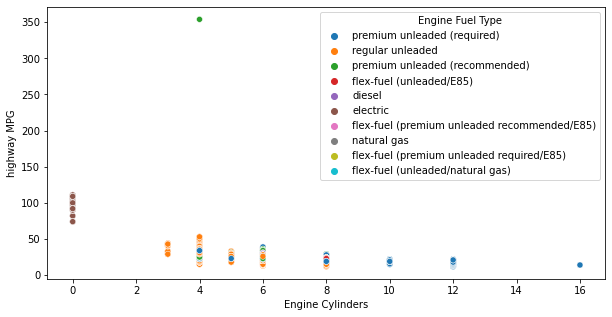

In [16]:
plt.figure(figsize=(10,5)) 
sns.scatterplot(data=df, x='Engine Cylinders', y='highway MPG', hue='Engine Fuel Type')

<AxesSubplot:xlabel='Engine Cylinders', ylabel='Engine HP'>

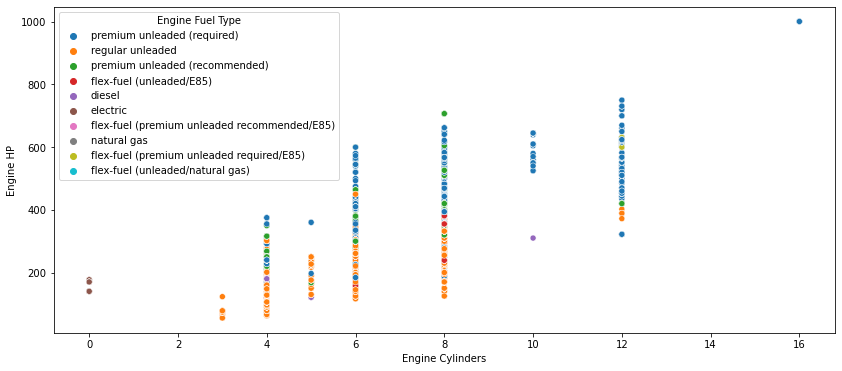

In [17]:
plt.figure(figsize=(14,6))
sns.scatterplot(data=df, x='Engine Cylinders', y='Engine HP', hue='Engine Fuel Type')

From both graphs there is a correlation to be made. As engine cylinders increase, MPG decreases and horse power increases. 

<AxesSubplot:xlabel='Engine HP', ylabel='highway MPG'>

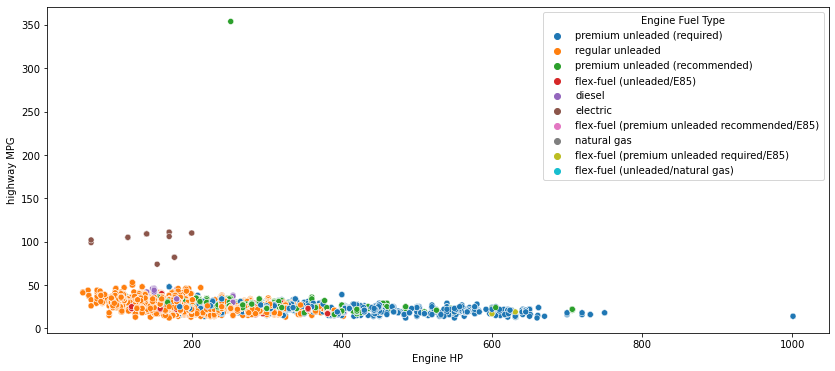

In [28]:
plt.figure(figsize=(14,6))
sns.scatterplot(data=df, x='Engine HP', y='highway MPG', hue='Engine Fuel Type')

In [37]:
df.sort_values(by=['highway MPG'], inplace=True,ascending=False)
df.head(50)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Made,Category
1119,Audi,A6,2017,premium unleaded (recommended),252.0,4.0,AUTOMATED_MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,354,24,3105,51600,German,Luxury
5792,BMW,i3,2017,electric,170.0,0.0,DIRECT_DRIVE,rear wheel drive,4.0,"Hatchback,Luxury",Compact,4dr Hatchback,111,137,3916,42400,German,Luxury
5790,BMW,i3,2015,electric,170.0,0.0,DIRECT_DRIVE,rear wheel drive,4.0,"Hatchback,Luxury",Compact,4dr Hatchback,111,137,3916,42400,German,Luxury
5791,BMW,i3,2016,electric,170.0,0.0,DIRECT_DRIVE,rear wheel drive,4.0,"Hatchback,Luxury",Compact,4dr Hatchback,111,137,3916,42400,German,Luxury
1983,Chevrolet,Bolt EV,2017,electric,200.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,110,128,1385,40905,American,Regular
1984,Chevrolet,Bolt EV,2017,electric,200.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,110,128,1385,36620,American,Regular
9869,Chevrolet,Spark EV,2015,electric,140.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,109,128,1385,25170,American,Regular
9872,Chevrolet,Spark EV,2016,electric,140.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,109,128,1385,25120,American,Regular
9868,Chevrolet,Spark EV,2014,electric,140.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,109,128,1385,27010,American,Regular
9867,Chevrolet,Spark EV,2014,electric,140.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,109,128,1385,26685,American,Regular


In [35]:
df.sort_values(by=['Engine HP'], inplace=True,ascending=False)
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Made,Category
11362,Bugatti,Veyron 16.4,2008,premium unleaded (required),1001.0,16.0,AUTOMATED_MANUAL,all wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,14,8,820,2065902,German,High-Performance
11363,Bugatti,Veyron 16.4,2008,premium unleaded (required),1001.0,16.0,AUTOMATED_MANUAL,all wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,14,8,820,1500000,German,High-Performance
11364,Bugatti,Veyron 16.4,2009,premium unleaded (required),1001.0,16.0,AUTOMATED_MANUAL,all wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,14,8,820,1705769,German,High-Performance
1630,Lamborghini,Aventador,2016,premium unleaded (required),750.0,12.0,AUTOMATED_MANUAL,all wheel drive,2.0,"Exotic,High-Performance",Midsize,Coupe,18,11,1158,490700,Italian,High-Performance
1629,Lamborghini,Aventador,2016,premium unleaded (required),750.0,12.0,AUTOMATED_MANUAL,all wheel drive,2.0,"Exotic,High-Performance",Midsize,Convertible,18,11,1158,535500,Italian,High-Performance
